In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from IPython.display import display

In [2]:
def stream(x,c,pi):
    dxdt =  pi[4]*x*c/(pi[1]+c)*(1-x) - pi[5]*x
    dcdt = -pi[0]*x*c/(pi[1]+c)*(1-x) + pi[2]*np.exp(-pi[3]*x)*(1-c)
    return dxdt,dcdt

xlin = np.linspace(0,2,51)
clin = np.linspace(0,1.1,51)
x,c   = np.meshgrid(xlin,clin)

In [3]:
eqTex = {"Gov. Eqs.":{
            'dCdt' : wd.HTMLMath(r"$\dfrac{dC}{dt} = -\hat{\mu}X\dfrac{C}{K_C + C} + (C_\infty-C)\exp{\left(-\beta \dfrac{X}{X_{\rm max}}\right)}$"),
            'dXdt' : wd.HTMLMath(r"$\dfrac{dX}{dt} = Y\hat{\mu}X\dfrac{C}{K_C + C} - k_{\rm die}X$")},
         "Nondim Eqs.":{
             'dcdt' : wd.HTMLMath(r"$\dfrac{dc}{d\tau} = -\pi_1 x\dfrac{c}{\pi_2 + c} + (1-c)\exp{\left(-\pi_4 x\right)}$"),
             'dxdt' : wd.HTMLMath(r"$\dfrac{dx}{d\tau} = \pi_5 x\dfrac{c}{\pi_2 + c} - \pi_6 x$")},
         "Π":{
             'pi0'  : wd.HTMLMath(r"$\pi_0 = X_{\rm max}/C_\infty$"),
             'pi1'  : wd.HTMLMath(r"$\pi_1 = K_C/C_\infty$"),
             'pi2'  : wd.HTMLMath(r"$\pi_2 = \alpha/\hat{\mu}$"),
             'pi3'  : wd.HTMLMath(r"$\pi_3 = \beta$"),
             'pi4'  : wd.HTMLMath(r"$\pi_4 = Y$"),
             'pi5'  : wd.HTMLMath(r"$\pi_5 = k_{\rm die}/\hat{\mu}$")}}

In [6]:
parameters = [r'X_{\rm max}',r'C_\infty',r'K_C',r'\alpha',r'\beta',r'Y',r'k_{\rm die}',r'\hat{\mu}']
KSliders = [wd.FloatSlider(value=1,min=0,max=10,step=0.1,description=f'${k}$') for k in parameters]
piBoxes  = [wd.FloatText(description=fr'$\pi_{{{i}}}$',disabled=True,layout=wd.Layout(width="50%")) for i in range(6)]

def pi(change):
    piBoxes[0].value = KSliders[0].value/KSliders[1].value
    piBoxes[1].value = KSliders[2].value/KSliders[1].value
    piBoxes[2].value = KSliders[3].value/KSliders[7].value
    piBoxes[3].value = KSliders[4].value
    piBoxes[4].value = KSliders[5].value
    piBoxes[5].value = KSliders[6].value/KSliders[7].value
    
    for piBox in piBoxes: piBox.value = round(piBox.value,2)
    return None
    
for slider in KSliders:
    slider.observe(pi,'value')
    
pi(0)

Output()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
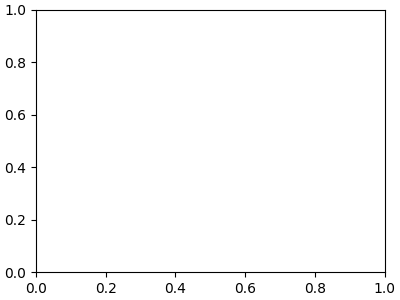

In [7]:
kw_streams = {'density':2,'linewidth':0.5,'arrowsize':0.5,
              'arrowstyle':'->','color':'k','minlength':0.2}

output = wd.Output()
with output:
    fig,ax = plt.subplots(figsize=[4,3],constrained_layout=True)

def updateFig(b):
    ax.cla()
    piArray = [slider.value for slider in piBoxes]
    dx,dc = stream(x,c,piArray)
    ax.streamplot(x,c,dx,dc,**kw_streams)
    ax.grid(True)
    plt.show()

tabs = wd.Tab(layout=wd.Layout())
children = []

for i,(TAB,DICT) in enumerate(eqTex.items()):
    tabs.set_title(i,TAB)
    block = wd.VBox([v for v in DICT.values()])
    children.append(block)

tabs.children=children
plotButton = wd.Button(description="Plot!",layout=wd.Layout(width="40%"))
plotButton.on_click(updateFig)

mainBox = wd.HBox([tabs,wd.VBox(KSliders),wd.VBox(piBoxes+[plotButton],layout=wd.Layout(align_items="flex-end"))])
display(mainBox,output)